In [4]:
library(SNFtool)

In [5]:
# #### MRNA MCI
mrna_mci <- read.csv("extdata/all_mci_mrna.csv", header=TRUE, row.names=1)

# #### Metab EMCI
metab_mci <- read.csv("extdata/all_mci_metab.csv", header=TRUE, row.names=1)

In [8]:
#EMCI
metab_emci = metab_mci[which(metab_mci$Label=="EMCI"),]
metab_emci = metab_emci[,-1] 
mrna_emci = mrna_mci[which(mrna_mci$Label=="EMCI"),]
mrna_emci = mrna_emci[,-1] 

#LMCI
metab_lmci = metab_mci[which(metab_mci$Label=="LMCI"),]
metab_lmci = metab_lmci[,-1] 
mrna_lmci = mrna_mci[which(mrna_mci$Label=="LMCI"),]
mrna_lmci = mrna_lmci[,-1] 

In [10]:
# EMCI Distance Matrix
Dist1_e = (dist2(as.matrix(mrna_emci),as.matrix(mrna_emci)))^(1/2)
Dist2_e = (dist2(as.matrix(metab_emci),as.matrix(metab_emci)))^(1/2)

In [11]:
# LMCI Distance Matrix
Dist1_l = (dist2(as.matrix(mrna_lmci),as.matrix(mrna_lmci)))^(1/2)
Dist2_l = (dist2(as.matrix(metab_lmci),as.matrix(metab_lmci)))^(1/2)

In [12]:
### parameters

## First, set all the parameters:
K_e = 10;		# number of neighbors, usually (10~30)
alpha_e = 0.8;  	# hyperparameter, usually (0.3~0.8)
T_e = 10; 	# Number of Iterations, usually (10~20)

K_l=10
alpha_l=0.8
T_l=20

In [13]:
W1_e = affinityMatrix(Dist1_e, K_e, alpha_e)
W2_e = affinityMatrix(Dist2_e, K_e, alpha_e)
W_e = SNF(list(W1_e,W2_e), K_e, T_e)

In [14]:
W1_l = affinityMatrix(Dist1_l, K_l, alpha_l)
W2_l = affinityMatrix(Dist2_l, K_l, alpha_l)
W_l = SNF(list(W1_l,W2_l), K_l, T_l)

In [ ]:
#### estimate number of clusters
estimationResult_e = estimateNumberOfClustersGivenGraph(W_e, 2:15);
estimationResult_e

In [ ]:
estimationResult_l = estimateNumberOfClustersGivenGraph(W_l, 2:15);
estimationResult_l

In [17]:
# #### make true labels
truelabel_e = rep(1,201)

truelabel_l = rep(1,200)



In [ ]:
group_e = spectralClustering(W_e,2)
group_e
table(group_e)

In [ ]:
group_l = spectralClustering(W_l,2)
group_l
table(group_l)

pdf 
  2

NULL

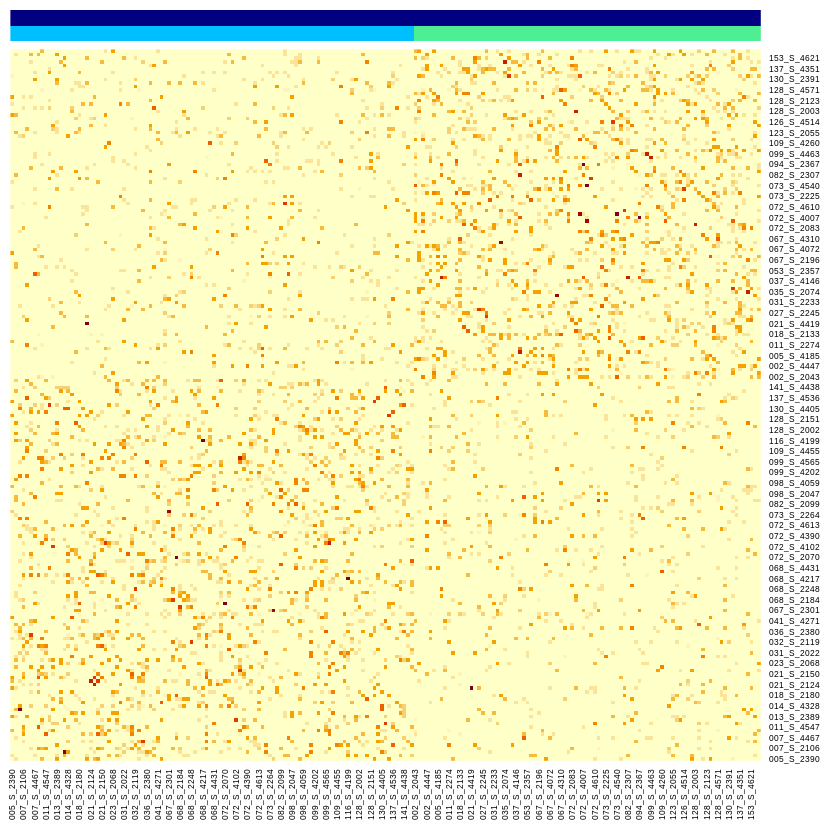

In [29]:
## Get a matrix containing the group information 
## for the samples such as the SpectralClustering result and the True label

C = 2                     # number of clusters
group_e = spectralClustering(W_e,C);    # the final subtypes information

M_label_e=cbind(group_e,truelabel_e)
colnames(M_label_e)=c("spectralClustering","TrueLabel")

M_label_colors_e=t(apply(M_label_e,1,getColorsForGroups))
## or choose you own colors for each label, for example:
M_label_colors_e=cbind("spectralClustering"=getColorsForGroups(M_label_e[,"spectralClustering"],colors=c("deepskyblue1","seagreen2","orange1")), ### 
"TrueLabel"=getColorsForGroups(M_label_e[,"TrueLabel"], colors=c("navy", "red1"))) 

png(filename="figs/Figure_2B.png", width=3.25,  height= 3.25, units= "in", res = 600)

dev.off()

displayClustersWithHeatmap(W_e, group_e, M_label_colors_e)

pdf 
  2

NULL

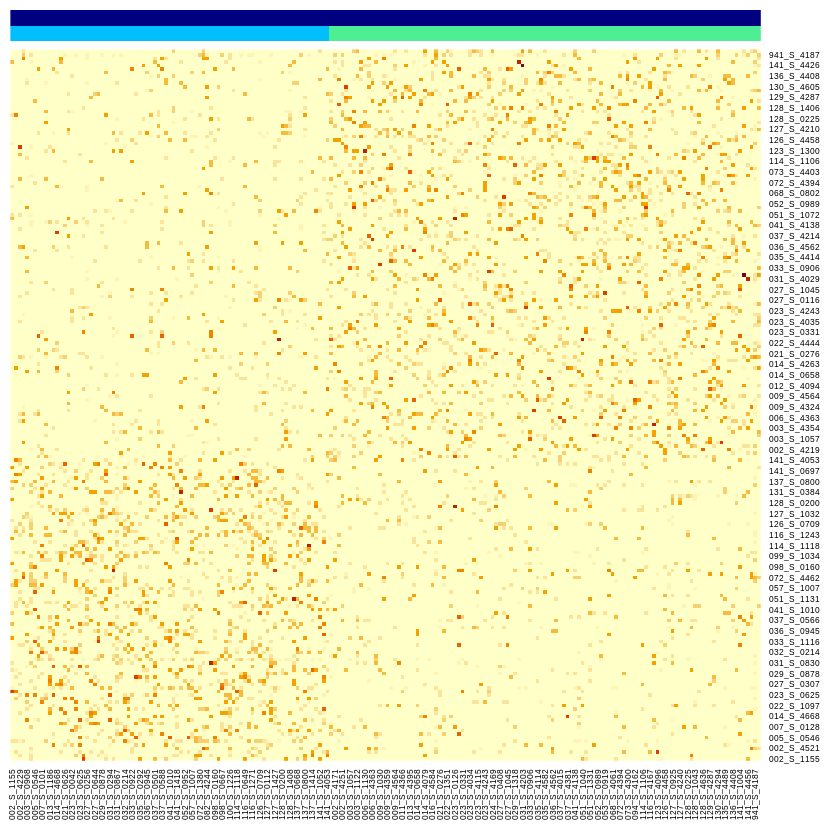

In [28]:
C = 2                     # number of clusters
group_l = spectralClustering(W_l,C);    # the final subtypes information

M_label_l=cbind(group_l,truelabel_l)
colnames(M_label_l)=c("spectralClustering","TrueLabel")

M_label_colors_l=t(apply(M_label_l,1,getColorsForGroups))
## or choose you own colors for each label, for example:
M_label_colors_l=cbind("spectralClustering"=getColorsForGroups(M_label_l[,"spectralClustering"],colors=c("deepskyblue1","seagreen2","orange1")), ### 
"TrueLabel"=getColorsForGroups(M_label_l[,"TrueLabel"], colors=c("navy", "red1"))) 

png(filename="figs/Figure_2F.png", width=3.25,  height= 3.25, units= "in", res = 600)

dev.off()

displayClustersWithHeatmap(W_l, group_l, M_label_colors_l)